**39\. Methodenseminar - Big Data Module II: Introduction to Social Network Science with Python**

# A tutorial on stochastic block modelling: SBM generation

**Author**: <a href='https://marcosoliveira.info/'>Marcos Oliveira</a>, GESIS - Leibniz Institute for the Social Sciences

**Version**: 29 May 2019

**Description**: This is an introduction to stochastic block modelling in Python using the <code>graph-tool</code> library. 
    
## Imports and Settings

In [1]:
import matplotlib.pyplot as plt
import numpy as np

<div class="alert alert-danger">
    You need the <code>graph_tool</code> library in your machine. Sometimes the installation is challenging. This <a href=https://git.skewed.de/count0/graph-tool/wikis/installation-instructions>page</a> might help you.
</div>

In [2]:
import graph_tool.all as gt
gt.openmp_set_num_threads(2)

In [3]:
def node_colors(g, group_memberships):
    # color of the nodes
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
    to_rgb = lambda h: list(int(h[i:i+2], 16)/255. for i in (0, 2, 4))
    vertex_color = g.new_vertex_property('vector<double>')
    for m, v in zip(group_memberships, g.vertices()):
        vertex_color[g.vertex(v)] = tuple(to_rgb(colors[m][1:]) + [255.0])
    return vertex_color

def generate_assortative_block_mix(group_sizes, p_ii, p_ij):
    groups = len(group_sizes)
    membership = np.concatenate([
        np.repeat(i, g) for (i, g) in zip(range(groups), group_sizes)
    ])
    propensity = np.zeros([groups, groups])
    for i in range(groups):
        for j in range(groups):
            if i == j:
                propensity[i, j] = p_ii * group_sizes[i] * group_sizes[j] 
            else:
                propensity[i, j] = p_ij * group_sizes[i] * group_sizes[j] / 2.    
    return membership, propensity

## Exercises

<div class="alert alert-success">
    <b>Exercise 1:</b> 
    
In some social networks, the age of the individuals plays a main role, producing the so-called 'ordered communities'. Create the block matrix for this type of structure and generate networks using SBM.
</div>

In [4]:
probabilities = np.array([[.30, .30, .01, .01],
                          [.30, .30, .30, .01],
                          [.01, .30, .30, .30],
                          [.01, .01, .30, .30]]) 

In [5]:
group_sizes = [50, 50, 50, 50]
group_memberships, _ = generate_assortative_block_mix(group_sizes, 0.3, 0.001)

In [6]:
propensity = np.zeros_like(probabilities)
for i in range(len(group_sizes)):
    for j in range(len(group_sizes)):
        propensity[i][j] = probabilities[i][j]*group_sizes[i]*group_sizes[j]
        if i == j:
            propensity[i][j] /= 2.0

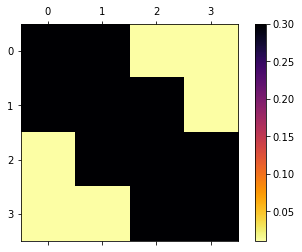

In [7]:
cax = plt.axes().matshow(probabilities, cmap=plt.cm.inferno_r)
plt.colorbar(cax);

In [8]:
g = gt.generate_sbm(group_memberships, propensity)

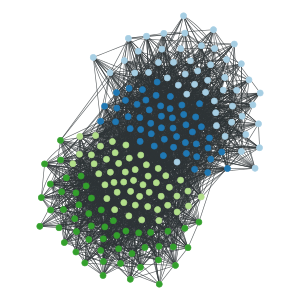

In [9]:
vertex_color = node_colors(g, group_memberships)
pos = gt.sfdp_layout(g)
gt.graph_draw(g, pos=pos, vertex_fill_color=vertex_color, vertex_color=vertex_color, output_size=(300, 300));

<div class="alert alert-success">
    <b>Exercise 2</b> 
    
Many real-world networks exhibit degree heterogeneity. Using the standard stochastic block model, create the block matrix for this type of structure and generate networks.
</div>

In [10]:
probabilities = np.array([[.0, .30, .30, .30],
                          [.3, .17, .12, .01],
                          [.3, .05, .12, .01],
                          [.3, .01, .01, .12]]) 

In [11]:
group_sizes = [50, 50, 50, 50]
group_memberships, _ = generate_assortative_block_mix(group_sizes, 0.5, 0.01)

In [12]:
propensity = np.zeros_like(probabilities)
for i in range(len(group_sizes)):
    for j in range(len(group_sizes)):
        propensity[i][j] = probabilities[i][j]*group_sizes[i]*group_sizes[j]
        if i == j:
            propensity[i][j] /= 2.0

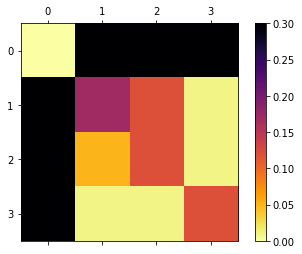

In [13]:
cax = plt.axes().matshow(probabilities, cmap=plt.cm.inferno_r)
plt.colorbar(cax);

In [14]:
g = gt.generate_sbm(group_memberships, propensity)

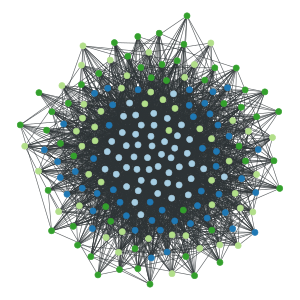

In [15]:
vertex_color = node_colors(g, group_memberships)
pos = gt.sfdp_layout(g)
gt.graph_draw(g, pos=pos, vertex_fill_color=vertex_color, vertex_color=vertex_color, output_size=(300, 300));

<div class="alert alert-success">
    <b>Exercise 3</b> 
    
Construct a network with a multi-core-periphery structure using the SBM.

</div>

In [16]:
probabilities = np.array([[.7, .3, .01, .01],
                          [.3, .2, .01, .01],
                          [.01, .01, .2, .3],
                          [.01, .01, .3, .7]]) 

In [17]:
group_sizes = [25, 50, 25, 50]
group_memberships, _ = generate_assortative_block_mix(group_sizes, 0.5, 0.01)

In [18]:
propensity = np.zeros_like(probabilities)
for i in range(len(group_sizes)):
    for j in range(len(group_sizes)):
        propensity[i][j] = probabilities[i][j]*group_sizes[i]*group_sizes[j]
        if i == j:
            propensity[i][j] /= 2.0

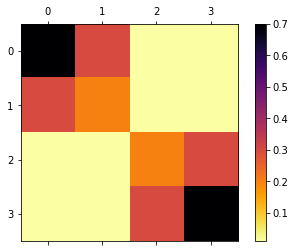

In [19]:
cax = plt.axes().matshow(probabilities, cmap=plt.cm.inferno_r)
plt.colorbar(cax);

In [20]:
g = gt.generate_sbm(group_memberships, propensity)

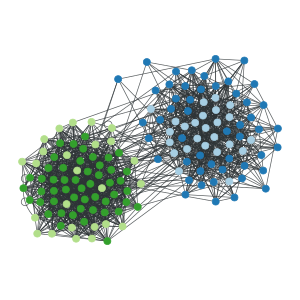

In [21]:
vertex_color = node_colors(g, group_memberships)
pos = gt.sfdp_layout(g)
gt.graph_draw(g, pos=pos, vertex_fill_color=vertex_color, vertex_color=vertex_color, output_size=(300, 300));

<div class="alert alert-success">
    <b>Exercise 4</b> 
    
Construct the following using the SBM:
<img src="images/sbm_hierarchy.png">

<b>Hint:</b> <code>gt.<b>remove_parallel_edges</b></code>
</div>


In [22]:
group_sizes = [2, 3, 5]
group_memberships, _ = generate_assortative_block_mix(group_sizes, 0.5, 0.01)

In [23]:
probabilities = np.array([[.00, 1.0, .00],
                          [1.0, .00, 1.0],
                          [.00, 1.0, .00]])
# probabilities = np.array([[.00, 1.0, .00, .00],
#                           [1.0, .00, 1.0, .00],
#                           [.00, 1.0, .00, 1.0],
#                           [.00, 0.0, 1.0, .00]])

propensity = np.zeros_like(probabilities)
for i in range(len(group_sizes)):
    for j in range(len(group_sizes)):
        propensity[i][j] = probabilities[i][j]*group_sizes[i]*group_sizes[j]
        if i == j:
            propensity[i][j] /= 2.0

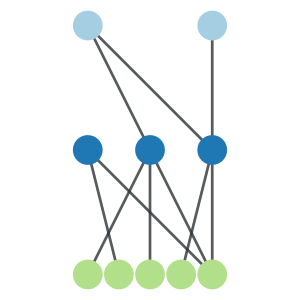

In [24]:
g = gt.generate_sbm(group_memberships, propensity)
gt.remove_parallel_edges(g)

#
pos_property = g.new_vertex_property("vector<double>") 
group_pos = np.arange(0, len(group_sizes))
group_count = [0.0]*len(group_sizes)
for group, v in zip(group_memberships, g.vertices()):
    pos_property[v] = [group_count[group]/(group_sizes[group]-1.0), group_pos[group]]
    group_count[group] += 1.0

#
vertex_color = node_colors(g, group_memberships)
gt.graph_draw(g, pos=pos_property, vertex_fill_color=vertex_color, vertex_color=vertex_color, output_size=(300, 300));

<div class="alert alert-success">
    <b>Exercise 5</b> 
    
Construct the following using the SBM:
<img src="images/sbm_ring.png">

</div>


In [25]:
probabilities = np.array([[0., 1., 0., 0., 0., 1.],
                          [1., 0., 1., 0., 0., 0.],
                          [0., 1., 0., 1., 0., 0.],
                          [0., 0., 1., 0., 1., 0.],
                          [0., 0., 0., 1., 0., 1.],
                          [0., 0., 0., 0., 1., 0.]])
probabilities *= 10

In [26]:
group_sizes = [1, 1, 1, 1, 1, 1]
group_memberships = np.concatenate([np.repeat(i, g) for (i, g) in zip(range(len(group_sizes)), group_sizes)])

In [27]:
propensity = np.zeros_like(probabilities)
for i in range(len(group_sizes)):
    for j in range(len(group_sizes)):
        propensity[i][j] = probabilities[i][j]*group_sizes[i]*group_sizes[j]
        if i == j:
            propensity[i][j] /= 2.0

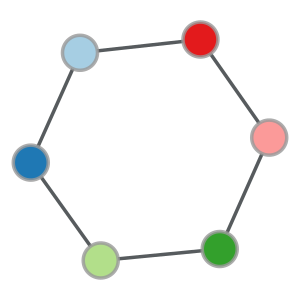

In [28]:
g = gt.generate_sbm(group_memberships, propensity)
gt.remove_parallel_edges(g)
pos = gt.sfdp_layout(g)

#
vertex_color = node_colors(g, group_memberships)
# gt.graph_draw(g, pos=pos_property, vertex_fill_color=vertex_color, vertex_color=vertex_color, output_size=(300, 300));

gt.graph_draw(g, pos=pos, output_size=(300, 300), vertex_fill_color=vertex_color);

<div class="alert alert-success">
    <b>Exercise 6</b> 
    
From the networks we already analyzed during the course, construct the SBM of it.

</div>